This is done as a second part of Project 2 in order to understand how the imbalanced data can be balanced using the Under-sampling method and understand how the ML Models perform with the sampled data.

For this purpose, I have combined the data of both the Test and Train dataset and the under sampling method has been applied.

For understanding purpose, only the accuracy score and the confusion matrix for each model has been evaluated.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# import machine learning modules
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, f1_score,  classification_report
from warnings import simplefilter
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [3]:
# Importing the Train dataset from csv file

mitbih_train_data = pd.read_csv('/content/sample_data/mitbih_train.csv',sep = ',',header=0)
mitbih_train_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,Target
0,0.978,0.926,0.681,0.2450,0.1540,0.1910,0.1520,0.0858,0.0588,0.0490,0.0441,0.0613,0.0662,0.0613,0.0490,0.0735,0.0613,0.0613,0.0662,0.0686,0.0956,0.0760,0.0931,0.1050,0.1150,0.103,0.118,0.125,0.142,0.127,0.152,0.145,0.1640,0.1450,0.1590,0.1520,0.154,0.1420,0.1520,0.15200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960,0.863,0.462,0.1970,0.0940,0.1250,0.0997,0.0883,0.0741,0.0826,0.0741,0.0627,0.0655,0.0655,0.0627,0.0769,0.0712,0.0826,0.0912,0.0969,0.0826,0.0826,0.0912,0.1050,0.1230,0.148,0.182,0.194,0.214,0.208,0.222,0.254,0.2710,0.2880,0.2850,0.2930,0.256,0.2480,0.1880,0.14500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000,0.659,0.186,0.0703,0.0703,0.0595,0.0568,0.0432,0.0541,0.0459,0.0568,0.0432,0.0676,0.0622,0.0784,0.0730,0.0865,0.0811,0.1080,0.1110,0.1350,0.1350,0.1700,0.1840,0.2160,0.238,0.270,0.286,0.316,0.319,0.332,0.297,0.2680,0.2160,0.1890,0.1320,0.119,0.0649,0.0649,0.04320,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925,0.666,0.541,0.2760,0.1960,0.0773,0.0718,0.0608,0.0663,0.0580,0.0635,0.0829,0.0856,0.0939,0.1130,0.1240,0.1410,0.1330,0.1410,0.0912,0.0856,0.0746,0.0718,0.0801,0.0967,0.119,0.138,0.141,0.138,0.146,0.110,0.102,0.0608,0.0276,0.0387,0.0138,0.011,0.0138,0.0331,0.00552,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967,1.000,0.831,0.5870,0.3570,0.2490,0.1460,0.0892,0.1170,0.1500,0.1310,0.1220,0.1410,0.1600,0.1500,0.1460,0.1360,0.1690,0.1780,0.1740,0.1830,0.2020,0.1880,0.1640,0.1880,0.216,0.216,0.202,0.211,0.230,0.216,0.230,0.2390,0.2680,0.2540,0.2300,0.221,0.2250,0.2110,0.17400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
mitbih_test_data = pd.read_csv('/content/sample_data/mitbih_test.csv',sep = ',',header=0)
mitbih_test_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,Target
0,1.000,0.758,0.112,0.000,0.0806,0.07850,0.0661,0.04960,0.0475,0.0351,0.0310,0.0289,0.0351,0.0269,0.0393,0.0351,0.0434,0.0475,0.0537,0.0537,0.0702,0.0723,0.0847,0.0971,0.122,0.132,0.169,0.196,0.215,0.2360,0.2540,0.2640,0.2850,0.2730,0.2670,0.2400,0.2150,0.1740,0.1570,0.1240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908,0.784,0.531,0.363,0.3660,0.34400,0.3330,0.30800,0.2970,0.3000,0.3040,0.3370,0.3770,0.3920,0.4400,0.4470,0.4580,0.4800,0.5130,0.5350,0.5860,0.5860,0.6040,0.6340,0.615,0.582,0.564,0.520,0.491,0.4910,0.4690,0.4540,0.4510,0.4650,0.4510,0.4320,0.4250,0.4100,0.3920,0.3700,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730,0.212,0.000,0.119,0.1020,0.10200,0.1110,0.12400,0.1150,0.1330,0.1060,0.1420,0.1280,0.1500,0.1330,0.1500,0.1330,0.1500,0.1240,0.1640,0.1370,0.1420,0.1330,0.1500,0.128,0.146,0.119,0.124,0.102,0.0929,0.0708,0.0796,0.0664,0.0708,0.0796,0.0929,0.0885,0.0841,0.0796,0.0885,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000,0.910,0.681,0.473,0.2290,0.06880,0.0000,0.00417,0.0146,0.0542,0.1020,0.1230,0.1500,0.1690,0.1730,0.1710,0.1690,0.1650,0.1560,0.1520,0.1480,0.1480,0.1460,0.1460,0.142,0.142,0.148,0.158,0.169,0.1790,0.1920,0.2060,0.2210,0.2400,0.2580,0.2750,0.2870,0.3080,0.3210,0.3310,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570,0.399,0.238,0.148,0.0000,0.00336,0.0403,0.08050,0.0705,0.0906,0.0805,0.1040,0.0940,0.1170,0.0973,0.1340,0.1240,0.1610,0.1710,0.1950,0.2050,0.2620,0.2750,0.3320,0.346,0.396,0.406,0.456,0.446,0.4460,0.3990,0.3690,0.3090,0.2950,0.2650,0.2720,0.2580,0.2680,0.2620,0.2820,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
mitbih_test_data["Target"].value_counts()

0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: Target, dtype: int64

In [6]:
mitbih_train_data["Target"].value_counts()

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: Target, dtype: int64

In [7]:
mitbih_train_data['Label']=" "

In [8]:
mitbih_train_data.dtypes

X1        float64
X2        float64
X3        float64
X4        float64
X5        float64
           ...   
X185      float64
X186      float64
X187      float64
Target    float64
Label      object
Length: 189, dtype: object

In [9]:
mitbih_test_data['Label']=" "
mitbih_test_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,Target,Label
0,1.000,0.758,0.112,0.000,0.0806,0.07850,0.0661,0.04960,0.0475,0.0351,0.0310,0.0289,0.0351,0.0269,0.0393,0.0351,0.0434,0.0475,0.0537,0.0537,0.0702,0.0723,0.0847,0.0971,0.122,0.132,0.169,0.196,0.215,0.2360,0.2540,0.2640,0.2850,0.2730,0.2670,0.2400,0.2150,0.1740,0.1570,0.1240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,0.908,0.784,0.531,0.363,0.3660,0.34400,0.3330,0.30800,0.2970,0.3000,0.3040,0.3370,0.3770,0.3920,0.4400,0.4470,0.4580,0.4800,0.5130,0.5350,0.5860,0.5860,0.6040,0.6340,0.615,0.582,0.564,0.520,0.491,0.4910,0.4690,0.4540,0.4510,0.4650,0.4510,0.4320,0.4250,0.4100,0.3920,0.3700,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,0.730,0.212,0.000,0.119,0.1020,0.10200,0.1110,0.12400,0.1150,0.1330,0.1060,0.1420,0.1280,0.1500,0.1330,0.1500,0.1330,0.1500,0.1240,0.1640,0.1370,0.1420,0.1330,0.1500,0.128,0.146,0.119,0.124,0.102,0.0929,0.0708,0.0796,0.0664,0.0708,0.0796,0.0929,0.0885,0.0841,0.0796,0.0885,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,1.000,0.910,0.681,0.473,0.2290,0.06880,0.0000,0.00417,0.0146,0.0542,0.1020,0.1230,0.1500,0.1690,0.1730,0.1710,0.1690,0.1650,0.1560,0.1520,0.1480,0.1480,0.1460,0.1460,0.142,0.142,0.148,0.158,0.169,0.1790,0.1920,0.2060,0.2210,0.2400,0.2580,0.2750,0.2870,0.3080,0.3210,0.3310,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,0.570,0.399,0.238,0.148,0.0000,0.00336,0.0403,0.08050,0.0705,0.0906,0.0805,0.1040,0.0940,0.1170,0.0973,0.1340,0.1240,0.1610,0.1710,0.1950,0.2050,0.2620,0.2750,0.3320,0.346,0.396,0.406,0.456,0.446,0.4460,0.3990,0.3690,0.3090,0.2950,0.2650,0.2720,0.2580,0.2680,0.2620,0.2820,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,


N - Normal Beat (0)

S - Supraventricular Ectopic Beat (1)

V - Ventricular Ectopic Beat (2)

F - Fusion Beat (3)

Q - Unknown Beat (4)



In [10]:
#The last column which is our Target specifies the type of the beat based on each patients 
mitbih_train_data.loc[mitbih_train_data['Target'] == 0 , 'Label'] = 'N'
mitbih_train_data.loc[mitbih_train_data['Target'] == 1 , 'Label'] = 'S'
mitbih_train_data.loc[mitbih_train_data['Target'] == 2 , 'Label'] = 'V'
mitbih_train_data.loc[mitbih_train_data['Target'] == 3 , 'Label'] = 'F'
mitbih_train_data.loc[mitbih_train_data['Target'] == 4 , 'Label'] = 'Q'

In [11]:
mitbih_test_data.loc[mitbih_test_data['Target'] == 0 , 'Label'] = 'N'
mitbih_test_data.loc[mitbih_test_data['Target'] == 1 , 'Label'] = 'S'
mitbih_test_data.loc[mitbih_test_data['Target'] == 2 , 'Label'] = 'V'
mitbih_test_data.loc[mitbih_test_data['Target'] == 3 , 'Label'] = 'F'
mitbih_test_data.loc[mitbih_test_data['Target'] == 4 , 'Label'] = 'Q'

In [12]:
mitbih_train_data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,Target,Label
0,0.978,0.926,0.681,0.2450,0.1540,0.1910,0.1520,0.08580,0.0588,0.0490,0.0441,0.0613,0.0662,0.0613,0.0490,0.0735,0.0613,0.0613,0.0662,0.0686,0.0956,0.0760,0.0931,0.1050,0.1150,0.10300,0.11800,0.12500,0.142,0.1270,0.1520,0.1450,0.1640,0.1450,0.1590,0.1520,0.1540,0.1420,0.1520,0.15200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
1,0.960,0.863,0.462,0.1970,0.0940,0.1250,0.0997,0.08830,0.0741,0.0826,0.0741,0.0627,0.0655,0.0655,0.0627,0.0769,0.0712,0.0826,0.0912,0.0969,0.0826,0.0826,0.0912,0.1050,0.1230,0.14800,0.18200,0.19400,0.214,0.2080,0.2220,0.2540,0.2710,0.2880,0.2850,0.2930,0.2560,0.2480,0.1880,0.14500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
2,1.000,0.659,0.186,0.0703,0.0703,0.0595,0.0568,0.04320,0.0541,0.0459,0.0568,0.0432,0.0676,0.0622,0.0784,0.0730,0.0865,0.0811,0.1080,0.1110,0.1350,0.1350,0.1700,0.1840,0.2160,0.23800,0.27000,0.28600,0.316,0.3190,0.3320,0.2970,0.2680,0.2160,0.1890,0.1320,0.1190,0.0649,0.0649,0.04320,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
3,0.925,0.666,0.541,0.2760,0.1960,0.0773,0.0718,0.06080,0.0663,0.0580,0.0635,0.0829,0.0856,0.0939,0.1130,0.1240,0.1410,0.1330,0.1410,0.0912,0.0856,0.0746,0.0718,0.0801,0.0967,0.11900,0.13800,0.14100,0.138,0.1460,0.1100,0.1020,0.0608,0.0276,0.0387,0.0138,0.0110,0.0138,0.0331,0.00552,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
4,0.967,1.000,0.831,0.5870,0.3570,0.2490,0.1460,0.08920,0.1170,0.1500,0.1310,0.1220,0.1410,0.1600,0.1500,0.1460,0.1360,0.1690,0.1780,0.1740,0.1830,0.2020,0.1880,0.1640,0.1880,0.21600,0.21600,0.20200,0.211,0.2300,0.2160,0.2300,0.2390,0.2680,0.2540,0.2300,0.2210,0.2250,0.2110,0.17400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807,0.495,0.537,0.5300,0.4910,0.4840,0.4560,0.39600,0.2840,0.1370,0.0526,0.1400,0.1190,0.0912,0.1400,0.1610,0.1050,0.1440,0.1440,0.1300,0.1470,0.1580,0.1650,0.1680,0.1540,0.17500,0.16500,0.15400,0.182,0.1930,0.1960,0.2070,0.2180,0.2180,0.2560,0.2840,0.2950,0.3020,0.3020,0.32300,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,Q
87550,0.718,0.605,0.487,0.3620,0.2320,0.1200,0.0517,0.00167,0.0000,0.0133,0.0783,0.1830,0.2750,0.3150,0.3620,0.4300,0.4820,0.5270,0.5430,0.5630,0.5820,0.5880,0.6000,0.6030,0.6130,0.62200,0.63700,0.65200,0.665,0.6820,0.7000,0.7120,0.7350,0.7630,0.7850,0.8100,0.8350,0.8570,0.8770,0.88000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,Q
87551,0.906,0.624,0.596,0.5760,0.5310,0.4820,0.4450,0.38800,0.3220,0.1920,0.0980,0.0490,0.0367,0.0531,0.0531,0.0980,0.1840,0.2690,0.3510,0.4080,0.4370,0.4690,0.4820,0.5180,0.5310,0.53500,0.5

In [13]:
mitbih_train_data.isna().sum()

X1        0
X2        0
X3        0
X4        0
X5        0
         ..
X185      0
X186      0
X187      0
Target    0
Label     0
Length: 189, dtype: int64

In [14]:
mitbih_test_data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,Target,Label
0,1.000,0.758,0.112,0.000,0.0806,0.07850,0.0661,0.04960,0.0475,0.0351,0.0310,0.0289,0.0351,0.0269,0.0393,0.0351,0.0434,0.0475,0.0537,0.0537,0.0702,0.0723,0.0847,0.0971,0.1220,0.132,0.1690,0.19600,0.2150,0.2360,0.2540,0.26400,0.2850,0.2730,0.2670,0.2400,0.2150,0.1740,0.1570,0.1240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
1,0.908,0.784,0.531,0.363,0.3660,0.34400,0.3330,0.30800,0.2970,0.3000,0.3040,0.3370,0.3770,0.3920,0.4400,0.4470,0.4580,0.4800,0.5130,0.5350,0.5860,0.5860,0.6040,0.6340,0.6150,0.582,0.5640,0.52000,0.4910,0.4910,0.4690,0.45400,0.4510,0.4650,0.4510,0.4320,0.4250,0.4100,0.3920,0.3700,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
2,0.730,0.212,0.000,0.119,0.1020,0.10200,0.1110,0.12400,0.1150,0.1330,0.1060,0.1420,0.1280,0.1500,0.1330,0.1500,0.1330,0.1500,0.1240,0.1640,0.1370,0.1420,0.1330,0.1500,0.1280,0.146,0.1190,0.12400,0.1020,0.0929,0.0708,0.07960,0.0664,0.0708,0.0796,0.0929,0.0885,0.0841,0.0796,0.0885,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
3,1.000,0.910,0.681,0.473,0.2290,0.06880,0.0000,0.00417,0.0146,0.0542,0.1020,0.1230,0.1500,0.1690,0.1730,0.1710,0.1690,0.1650,0.1560,0.1520,0.1480,0.1480,0.1460,0.1460,0.1420,0.142,0.1480,0.15800,0.1690,0.1790,0.1920,0.20600,0.2210,0.2400,0.2580,0.2750,0.2870,0.3080,0.3210,0.3310,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
4,0.570,0.399,0.238,0.148,0.0000,0.00336,0.0403,0.08050,0.0705,0.0906,0.0805,0.1040,0.0940,0.1170,0.0973,0.1340,0.1240,0.1610,0.1710,0.1950,0.2050,0.2620,0.2750,0.3320,0.3460,0.396,0.4060,0.45600,0.4460,0.4460,0.3990,0.36900,0.3090,0.2950,0.2650,0.2720,0.2580,0.2680,0.2620,0.2820,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.929,0.871,0.805,0.743,0.6510,0.53600,0.3940,0.25100,0.1400,0.1020,0.0759,0.0322,0.0000,0.0126,0.1200,0.2440,0.3100,0.3680,0.4130,0.4340,0.5020,0.5330,0.5630,0.6280,0.6710,0.685,0.6790,0.67900,0.6770,0.6820,0.6910,0.70000,0.7140,0.7370,0.7530,0.7710,0.7840,0.8000,0.8070,0.8140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,Q
21888,0.803,0.692,0.587,0.447,0.3180,0.19000,0.1180,0.07770,0.1120,0.1520,0.2900,0.3770,0.4130,0.4530,0.5290,0.5830,0.6410,0.6620,0.6790,0.6850,0.6950,0.7000,0.7100,0.7040,0.7260,0.735,0.7550,0.75500,0.7650,0.7760,0.7940,0.80600,0.8280,0.8460,0.8710,0.8860,0.9160,0.9240,0.9390,0.9280,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,Q
21889,1.000,0.967,0.620,0.347,0.1390,0.08900,0.1040,0.10100,0.1070,0.1010,0.1040,0.0861,0.0920,0.0831,0.0920,0.0772,0.0682,0.0534,0.0534,0.0445,0.0415,0.0326,0.0356,0.0089,0.0208,0.000,0.0089,0.00297,0.00

In [15]:
mitbih_test_data.isnull().sum()

X1        0
X2        0
X3        0
X4        0
X5        0
         ..
X185      0
X186      0
X187      0
Target    0
Label     0
Length: 189, dtype: int64

In [16]:
# combining the two datasets 
frames = [mitbih_train_data, mitbih_test_data]

mitbih_data = pd.concat(frames)

mitbih_data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,Target,Label
0,0.978,0.926,0.681,0.2450,0.1540,0.1910,0.1520,0.0858,0.0588,0.0490,0.0441,0.0613,0.0662,0.0613,0.0490,0.0735,0.0613,0.0613,0.0662,0.0686,0.0956,0.0760,0.0931,0.1050,0.1150,0.103,0.1180,0.12500,0.1420,0.127,0.1520,0.14500,0.1640,0.1450,0.1590,0.1520,0.1540,0.1420,0.1520,0.15200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
1,0.960,0.863,0.462,0.1970,0.0940,0.1250,0.0997,0.0883,0.0741,0.0826,0.0741,0.0627,0.0655,0.0655,0.0627,0.0769,0.0712,0.0826,0.0912,0.0969,0.0826,0.0826,0.0912,0.1050,0.1230,0.148,0.1820,0.19400,0.2140,0.208,0.2220,0.25400,0.2710,0.2880,0.2850,0.2930,0.2560,0.2480,0.1880,0.14500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
2,1.000,0.659,0.186,0.0703,0.0703,0.0595,0.0568,0.0432,0.0541,0.0459,0.0568,0.0432,0.0676,0.0622,0.0784,0.0730,0.0865,0.0811,0.1080,0.1110,0.1350,0.1350,0.1700,0.1840,0.2160,0.238,0.2700,0.28600,0.3160,0.319,0.3320,0.29700,0.2680,0.2160,0.1890,0.1320,0.1190,0.0649,0.0649,0.04320,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
3,0.925,0.666,0.541,0.2760,0.1960,0.0773,0.0718,0.0608,0.0663,0.0580,0.0635,0.0829,0.0856,0.0939,0.1130,0.1240,0.1410,0.1330,0.1410,0.0912,0.0856,0.0746,0.0718,0.0801,0.0967,0.119,0.1380,0.14100,0.1380,0.146,0.1100,0.10200,0.0608,0.0276,0.0387,0.0138,0.0110,0.0138,0.0331,0.00552,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
4,0.967,1.000,0.831,0.5870,0.3570,0.2490,0.1460,0.0892,0.1170,0.1500,0.1310,0.1220,0.1410,0.1600,0.1500,0.1460,0.1360,0.1690,0.1780,0.1740,0.1830,0.2020,0.1880,0.1640,0.1880,0.216,0.2160,0.20200,0.2110,0.230,0.2160,0.23000,0.2390,0.2680,0.2540,0.2300,0.2210,0.2250,0.2110,0.17400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.929,0.871,0.805,0.7430,0.6510,0.5360,0.3940,0.2510,0.1400,0.1020,0.0759,0.0322,0.0000,0.0126,0.1200,0.2440,0.3100,0.3680,0.4130,0.4340,0.5020,0.5330,0.5630,0.6280,0.6710,0.685,0.6790,0.67900,0.6770,0.682,0.6910,0.70000,0.7140,0.7370,0.7530,0.7710,0.7840,0.8000,0.8070,0.81400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,Q
21888,0.803,0.692,0.587,0.4470,0.3180,0.1900,0.1180,0.0777,0.1120,0.1520,0.2900,0.3770,0.4130,0.4530,0.5290,0.5830,0.6410,0.6620,0.6790,0.6850,0.6950,0.7000,0.7100,0.7040,0.7260,0.735,0.7550,0.75500,0.7650,0.776,0.7940,0.80600,0.8280,0.8460,0.8710,0.8860,0.9160,0.9240,0.9390,0.92800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,Q
21889,1.000,0.967,0.620,0.3470,0.1390,0.0890,0.1040,0.1010,0.1070,0.1010,0.1040,0.0861,0.0920,0.0831,0.0920,0.0772,0.0682,0.0534,0.0534,0.0445,0.0415,0.0326,0.0356,0.0089,0.0208,0.000,0.0089,0.00297,0.0089,0.000

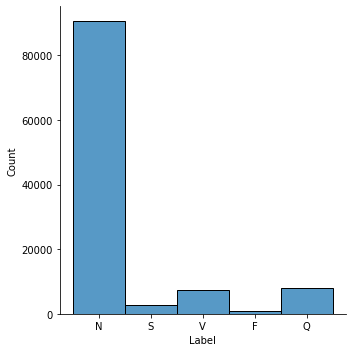

In [17]:
sns.displot(mitbih_data['Label'])

In [19]:
X = mitbih_data.drop(['Target','Label'], axis=1)
y= mitbih_data.Label
y1=mitbih_data.Target

In [20]:
X

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187
0,0.978,0.926,0.681,0.2450,0.1540,0.1910,0.1520,0.0858,0.0588,0.0490,0.0441,0.0613,0.0662,0.0613,0.0490,0.0735,0.0613,0.0613,0.0662,0.0686,0.0956,0.0760,0.0931,0.1050,0.1150,0.103,0.1180,0.12500,0.1420,0.127,0.1520,0.14500,0.1640,0.1450,0.1590,0.1520,0.1540,0.1420,0.1520,0.15200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960,0.863,0.462,0.1970,0.0940,0.1250,0.0997,0.0883,0.0741,0.0826,0.0741,0.0627,0.0655,0.0655,0.0627,0.0769,0.0712,0.0826,0.0912,0.0969,0.0826,0.0826,0.0912,0.1050,0.1230,0.148,0.1820,0.19400,0.2140,0.208,0.2220,0.25400,0.2710,0.2880,0.2850,0.2930,0.2560,0.2480,0.1880,0.14500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000,0.659,0.186,0.0703,0.0703,0.0595,0.0568,0.0432,0.0541,0.0459,0.0568,0.0432,0.0676,0.0622,0.0784,0.0730,0.0865,0.0811,0.1080,0.1110,0.1350,0.1350,0.1700,0.1840,0.2160,0.238,0.2700,0.28600,0.3160,0.319,0.3320,0.29700,0.2680,0.2160,0.1890,0.1320,0.1190,0.0649,0.0649,0.04320,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925,0.666,0.541,0.2760,0.1960,0.0773,0.0718,0.0608,0.0663,0.0580,0.0635,0.0829,0.0856,0.0939,0.1130,0.1240,0.1410,0.1330,0.1410,0.0912,0.0856,0.0746,0.0718,0.0801,0.0967,0.119,0.1380,0.14100,0.1380,0.146,0.1100,0.10200,0.0608,0.0276,0.0387,0.0138,0.0110,0.0138,0.0331,0.00552,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967,1.000,0.831,0.5870,0.3570,0.2490,0.1460,0.0892,0.1170,0.1500,0.1310,0.1220,0.1410,0.1600,0.1500,0.1460,0.1360,0.1690,0.1780,0.1740,0.1830,0.2020,0.1880,0.1640,0.1880,0.216,0.2160,0.20200,0.2110,0.230,0.2160,0.23000,0.2390,0.2680,0.2540,0.2300,0.2210,0.2250,0.2110,0.17400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.929,0.871,0.805,0.7430,0.6510,0.5360,0.3940,0.2510,0.1400,0.1020,0.0759,0.0322,0.0000,0.0126,0.1200,0.2440,0.3100,0.3680,0.4130,0.4340,0.5020,0.5330,0.5630,0.6280,0.6710,0.685,0.6790,0.67900,0.6770,0.682,0.6910,0.70000,0.7140,0.7370,0.7530,0.7710,0.7840,0.8000,0.8070,0.81400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21888,0.803,0.692,0.587,0.4470,0.3180,0.1900,0.1180,0.0777,0.1120,0.1520,0.2900,0.3770,0.4130,0.4530,0.5290,0.5830,0.6410,0.6620,0.6790,0.6850,0.6950,0.7000,0.7100,0.7040,0.7260,0.735,0.7550,0.75500,0.7650,0.776,0.7940,0.80600,0.8280,0.8460,0.8710,0.8860,0.9160,0.9240,0.9390,0.92800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21889,1.000,0.967,0.620,0.3470,0.1390,0.0890,0.1040,0.1010,0.1070,0.1010,0.1040,0.0861,0.0920,0.0831,0.0920,0.0772,0.0682,0.0534,0.0534,0.0445,0.0415,0.0326,0.0356,0.0089,0.0208,0.000,0.0089,0.00297,0

In [21]:
y

0        N
1        N
2        N
3        N
4        N
        ..
21887    Q
21888    Q
21889    Q
21890    Q
21891    Q
Name: Label, Length: 109446, dtype: object

In [22]:
y1

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
21887    4.0
21888    4.0
21889    4.0
21890    4.0
21891    4.0
Name: Target, Length: 109446, dtype: float64

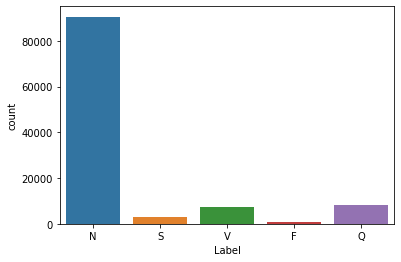

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=mitbih_data, x='Label')

Here we can see that there are more samples for Normal Heart beat compared to other types. Hence, we are going with the under-sampling method

In [25]:
from imblearn.under_sampling import NearMiss


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [26]:
nm=NearMiss(random_state=42)
X_res, y_res=nm.fit_sample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [27]:
X_res.shape, y_res.shape

((4015, 187), (4015,))

We can see that lot of sample data has been lost here into order to under sample the Normal beats and make all samples equally balanced. This could be a disadvantage. But this process is done only for learning purpose.

In [28]:
y_res

array(['F', 'F', 'F', ..., 'V', 'V', 'V'], dtype=object)

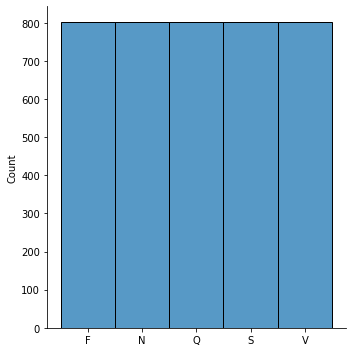

In [29]:
sns.displot(y_res)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.25, random_state=10 )

**Logistic Regression**

In [32]:
# instatiate a linear model and check cross-validation performance
simplefilter("ignore")
model_lr = LogisticRegression()
cv_score = cross_val_score(model_lr, X_train, y_train, cv=5)
print(cv_score)
print(cv_score.mean())

[0.80431177 0.82225914 0.84883721 0.82392027 0.82890365]
0.8256464080483518


In [33]:
# train the classifier and evaluate the performance in the test set
model_lr.fit(X_train, y_train)
y_pred_lr= model_lr.predict(X_test)
# compute the accuracy
print(accuracy_score(y_test, y_pred_lr))


0.8117529880478087


In [35]:
cnf_matrix_lr=confusion_matrix(y_test, y_pred_lr,labels=('N','S','V','F','Q'))
cnf_matrix_lr

array([[206,   7,   0,   3,   2],
       [  4, 153,   7,   8,  16],
       [  2,  10, 150,  40,   8],
       [ 28,   9,  28, 131,   5],
       [  0,   4,   8,   0, 175]])

Text(0.5, 257.44, 'Predicted label')

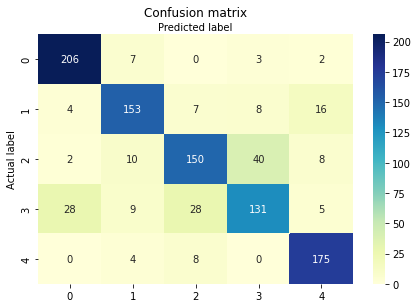

In [36]:
# Visualising the Confusion Matrix in the form of Heat Map
class_names=['N','S','V','F','Q'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_lr), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

The Accuracy score using the Linear Regression model for the balanced dataset is 81%, which is less compared to the one with the imbalanced dataset. But the Confusion Matrix shows that most of the the classes have been correctly classified

**Random Forest Classifier**

In [37]:
rf_model=RandomForestClassifier()

In [40]:
rf_model.fit(X_train, y_train)
y_pred_rfc= rf_model.predict(X_test)
# compute the accuracy
print("Accuracy Score for Random Forest Classifier Model:",accuracy_score(y_test, y_pred))

Accuracy Score for Random Forest Classifier Model: 0.9053784860557769


In [41]:
cnf_matrix_rfc=confusion_matrix(y_test, y_pred_rfc,labels=('N','S','V','F','Q'))
cnf_matrix_rfc

array([[213,   0,   0,   5,   0],
       [  0, 173,   3,   6,   6],
       [  2,   7, 180,  19,   2],
       [ 17,   5,  13, 165,   1],
       [  0,   2,   2,   0, 183]])

Text(0.5, 257.44, 'Predicted label')

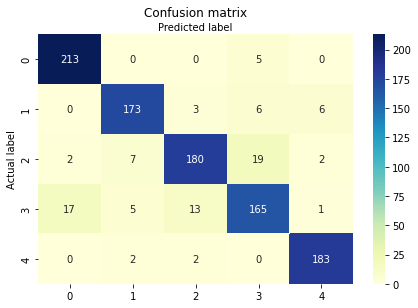

In [42]:
# Visualising the Confusion Matrix in the form of Heat Map
class_names=['N','S','V','F','Q'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_rfc), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

The Random forest Model also performs well with the banalced dataset.

**Support Vector Machine**

In [43]:
svc=SVC()
svc.fit(X_train, y_train)
y_pred_svc= svc.predict(X_test)
# compute the accuracy
print(" Accuracy Score for Support Vector Machine Model:", accuracy_score(y_test, y_pred_svc))

 Accuracy Score for Support Vector Machine Model: 0.8754980079681275


In [44]:
cnf_matrix_svc=confusion_matrix(y_test, y_pred_svc,labels=('N','S','V','F','Q'))
cnf_matrix_svc

array([[215,   1,   0,   2,   0],
       [  2, 166,   5,   5,  10],
       [  1,   6, 177,  24,   2],
       [ 30,   6,  23, 140,   2],
       [  0,   4,   2,   0, 181]])

Text(0.5, 257.44, 'Predicted label')

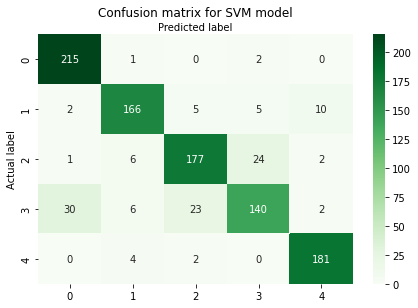

In [46]:
# Visualising the Confusion Matrix in the form of Heat Map
class_names=['N','S','V','F','Q'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_svc), annot=True,cmap=plt.cm.Greens,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for SVM model', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [49]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           F       0.82      0.70      0.75       201
           N       0.87      0.99      0.92       218
           Q       0.93      0.97      0.95       187
           S       0.91      0.88      0.89       188
           V       0.86      0.84      0.85       210

    accuracy                           0.88      1004
   macro avg       0.88      0.88      0.87      1004
weighted avg       0.87      0.88      0.87      1004



**K-Nearest Neighbours**

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("Accuracy SCore for KNN Model:", accuracy_score(y_test, y_pred_knn))

Accuracy SCore for KNN Model: 0.8675298804780877


In [52]:
cnf_matrix_knn=print(confusion_matrix(y_test, y_pred_knn,labels=('N','S','V','F','Q')))

[[211   0   0   7   0]
 [  4 153   5  11  15]
 [  2   7 174  23   4]
 [ 27   2  17 154   1]
 [  0   4   2   2 179]]


In [53]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           F       0.78      0.77      0.77       201
           N       0.86      0.97      0.91       218
           Q       0.90      0.96      0.93       187
           S       0.92      0.81      0.86       188
           V       0.88      0.83      0.85       210

    accuracy                           0.87      1004
   macro avg       0.87      0.87      0.87      1004
weighted avg       0.87      0.87      0.87      1004



**Gradient Boost**

In [55]:
# check performance for ensemble models
model_gb = GradientBoostingClassifier()
model_gb.fit(X_train, y_train)
y_pred_gb= model_gb.predict(X_test)


In [56]:
# compute the accuracy
print("Accuracy SCore for KNN Model:", accuracy_score(y_test, y_pred_gb))

Accuracy SCore for KNN Model: 0.897410358565737


In [57]:
cnf_matrix_gb= print(confusion_matrix(y_test, y_pred_gb,labels=('N','S','V','F','Q')))

[[214   1   0   3   0]
 [  0 166   4   8  10]
 [  0   6 179  21   4]
 [ 17   6  14 162   2]
 [  0   2   3   2 180]]


In [59]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           F       0.83      0.81      0.82       201
           N       0.93      0.98      0.95       218
           Q       0.92      0.96      0.94       187
           S       0.92      0.88      0.90       188
           V       0.90      0.85      0.87       210

    accuracy                           0.90      1004
   macro avg       0.90      0.90      0.90      1004
weighted avg       0.90      0.90      0.90      1004



**Conclusion:**

After applying the ML models on the under-sampled data, we can observe that most of the data has been correctly classified as per the confusion matrix for all the models. Among them, the Random Forest Classifier and the Gradient boost seem to have a higher accuracy score and perform well.